<a href="https://colab.research.google.com/github/pankajrana1111/Image-Classification/blob/pankajrana1111-patch-1/Capstone_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#***Loading dataset from GitHub***

In [1]:
#getting repository from github
!git clone https://github.com/pankajrana1111/Image-Classification.git

Cloning into 'Image-Classification'...
remote: Enumerating objects: 12, done.
remote: Counting objects: 100% (12/12), done.
remote: Compressing objects: 100% (12/12), done.
remote: Total 1190 (delta 5), reused 0 (delta 0), pack-reused 1178
Receiving objects: 100% (1190/1190), 135.19 MiB | 23.94 MiB/s, done.
Resolving deltas: 100% (42/42), done.


In [2]:
#extacting data from the archived files
!pip install patool
import patoolib
patoolib.extract_archive("Image-Classification/fashion1.rar", outdir="Image-Classification")
patoolib.extract_archive("Image-Classification/fashion2.rar", outdir="Image-Classification")
patoolib.extract_archive("Image-Classification/fashion3.rar", outdir="Image-Classification")
patoolib.extract_archive("Image-Classification/fashion4.rar", outdir="Image-Classification")
patoolib.extract_archive("Image-Classification/fashion5.rar", outdir="Image-Classification")
patoolib.extract_archive("Image-Classification/fashion6.rar", outdir="Image-Classification")

     |████████████████████████████████| 81kB 5.8MB/s 
patool: Extracting Image-Classification/fashion1.rar ...
patool: running /usr/bin/unrar x -- /content/Image-Classification/fashion1.rar
patool:     with cwd='Image-Classification'
patool: ... Image-Classification/fashion1.rar extracted to `Image-Classification'.
patool: Extracting Image-Classification/fashion2.rar ...
patool: running /usr/bin/unrar x -- /content/Image-Classification/fashion2.rar
patool:     with cwd='Image-Classification'
patool: ... Image-Classification/fashion2.rar extracted to `Image-Classification'.
patool: Extracting Image-Classification/fashion3.rar ...
patool: running /usr/bin/unrar x -- /content/Image-Classification/fashion3.rar
patool:     with cwd='Image-Classification'
patool: ... Image-Classification/fashion3.rar extracted to `Image-Classification'.
patool: Extracting Image-Classification/fashion4.rar ...
patool: running /usr/bin/unrar x -- /content/Image-Classification/fashion4.rar
patool:     with cwd=

'Image-Classification'

In [3]:
# importing all required libararies. The libaries are imported in the sequence of their usage.
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn import preprocessing
import cv2
from keras.preprocessing.image import load_img
from keras.preprocessing.image import img_to_array
from keras.applications import VGG16
from keras.applications import imagenet_utils
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, accuracy_score

In [4]:
##creating the lists of image locations
image_loc1=[os.path.join("Image-Classification/fashion1",img) for img in os.listdir("Image-Classification/fashion1")]
image_loc2=[os.path.join("Image-Classification/fashion2",img) for img in os.listdir("Image-Classification/fashion2")]
image_loc3=[os.path.join("Image-Classification/fashion3",img) for img in os.listdir("Image-Classification/fashion3")]
image_loc4=[os.path.join("Image-Classification/fashion4",img) for img in os.listdir("Image-Classification/fashion4")]
image_loc5=[os.path.join("Image-Classification/fashion5",img) for img in os.listdir("Image-Classification/fashion5")]
image_loc6=[os.path.join("Image-Classification/fashion6",img) for img in os.listdir("Image-Classification/fashion6")]

In [5]:
##combining all the images in one list
image_loc_list=image_loc1 + image_loc2 + image_loc3 + image_loc4 + image_loc5 + image_loc6
len(image_loc_list)

6000

In [6]:
image_loc_list[0:10]

['Image-Classification/fashion1/5da81b60b25b035d1d17a72c_3.jpg',
 'Image-Classification/fashion1/5da81b7ab25b035d1d17a80f_2.jpg',
 'Image-Classification/fashion1/5da81af07d3a9baa211f81dd_2.jpg',
 'Image-Classification/fashion1/5da81abeb25b035d1d17a4cc_2.jpg',
 'Image-Classification/fashion1/5da81b2a6504fb65c4de3da5_2.jpg',
 'Image-Classification/fashion1/5da81abeb25b035d1d17a501_2.jpg',
 'Image-Classification/fashion1/5da81b60b25b035d1d17a70a_0.jpg',
 'Image-Classification/fashion1/5da81b177f3e301b4504b43d_0.jpg',
 'Image-Classification/fashion1/5da81acb7d3a9baa211f7f77_0.jpg',
 'Image-Classification/fashion1/5da81ae27d3a9baa211f8106_3.jpg']

In [9]:
## the order of the list obtained should match with the image coloum in the dataframe data
data=pd.read_csv("Image-Classification/train.csv")
sorted_image_list=[]
for image in data.images:
    for item in image_loc_list:
        if image in item:
            sorted_image_list.append(item)
            
### the output contains a list of image locations exactly in the same order as present in the test file. This activity was done
##  to create exactly the same labels against the obtained combined list obtained from six folders.            

In [10]:
sorted_image_list[0:10]

['Image-Classification/fashion2/5da81ceb7861c2af6a5a89a7_1.jpg',
 'Image-Classification/fashion3/5da81d8a7861c2af6a5a901c_3.jpg',
 'Image-Classification/fashion4/5da820f26504fb65da0043e6_0.jpg',
 'Image-Classification/fashion2/5da81c026504fb65cea700d2_0.jpg',
 'Image-Classification/fashion2/5da81d2c7861c2af6a5a8c64_2.jpg',
 'Image-Classification/fashion3/5da81d8a7861c2af6a5a9051_3.jpg',
 'Image-Classification/fashion1/5da81b33b25b035d1d17a612_0.jpg',
 'Image-Classification/fashion1/5da81b60b25b035d1d17a72a_3.jpg',
 'Image-Classification/fashion4/5da821f66504fb65da005733_1.jpg',
 'Image-Classification/fashion3/5da81eff7f3e301b4504b90b_0.jpg']

In [11]:
## replacing the files coloum with sorted_image_list in train dataframe

data["files"]=sorted_image_list

#***Exploratory Data Analysis***

In [12]:
data.head()

,files,target,images
0,Image-Classification/fashion2/5da81ceb7861c2af...,shoes,5da81ceb7861c2af6a5a89a7_1.jpg
1,Image-Classification/fashion3/5da81d8a7861c2af...,beauty,5da81d8a7861c2af6a5a901c_3.jpg
2,Image-Classification/fashion4/5da820f26504fb65...,beauty,5da820f26504fb65da0043e6_0.jpg
3,Image-Classification/fashion2/5da81c026504fb65...,jewelry and watches,5da81c026504fb65cea700d2_0.jpg
4,Image-Classification/fashion2/5da81d2c7861c2af...,bags,5da81d2c7861c2af6a5a8c64_2.jpg


COMMENT: From the first look of the dataframe we observed that the target variable contains the categories of the images.

In [13]:
#checking size of the data
data.shape

(6000, 3)

In [14]:
#checking for any missing values in the data
data.isnull().sum()

files     0
target    0
images    0
dtype: int64

['shoes' 'beauty' 'jewelry and watches' 'bags']
[1465, 1524, 1503, 1508]


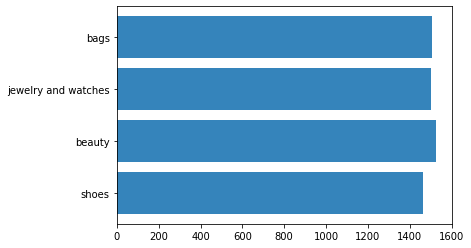

In [19]:
##plotting the no. of images in each category
y_labels=data.target.unique()
print (y_labels)
counts=[data.target.tolist().count(i) for i in y_labels]
print(counts)
plt.barh(y_labels,counts,align="center",alpha=0.9)
plt.show()

COMMENT: In the plot we observed that the no. of images in each category are almost equal and hence we have a balanced dataset.

In [20]:
# plotting sample images
def show_imgs(X):
    plt.figure(figsize=(8, 8))
    k = 0
    for i in range(0,4):
        for j in range(0,4):
            image = load_img(data.files[k], target_size=(224, 224))
            plt.subplot2grid((4,4),(i,j))
            plt.imshow(image)
            k = k+1
    plt.show()

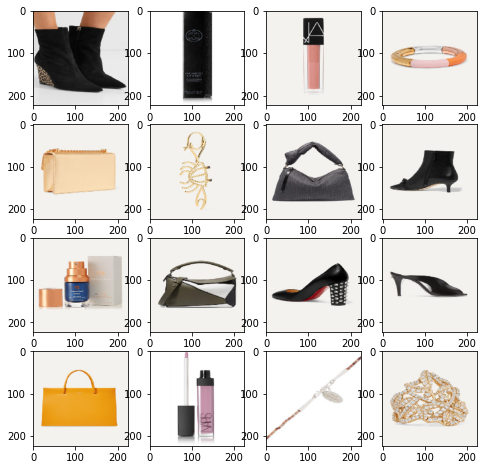

In [21]:
show_imgs(data.files)

#***Creating Lables***

In [22]:
label_encoder = preprocessing.LabelEncoder() 
labels=list(label_encoder.fit_transform(data["target"]))

In [23]:
data["labels"]=labels

In [24]:
data.head(20)

,files,target,images,labels
0,Image-Classification/fashion2/5da81ceb7861c2af...,shoes,5da81ceb7861c2af6a5a89a7_1.jpg,3
1,Image-Classification/fashion3/5da81d8a7861c2af...,beauty,5da81d8a7861c2af6a5a901c_3.jpg,1
2,Image-Classification/fashion4/5da820f26504fb65...,beauty,5da820f26504fb65da0043e6_0.jpg,1
3,Image-Classification/fashion2/5da81c026504fb65...,jewelry and watches,5da81c026504fb65cea700d2_0.jpg,2
4,Image-Classification/fashion2/5da81d2c7861c2af...,bags,5da81d2c7861c2af6a5a8c64_2.jpg,0
5,Image-Classification/fashion3/5da81d8a7861c2af...,jewelry and watches,5da81d8a7861c2af6a5a9051_3.jpg,2
6,Image-Classification/fashion1/5da81b33b25b035d...,bags,5da81b33b25b035d1d17a612_0.jpg,0
7,Image-Classification/fashion1/5da81b60b25b035d...,shoes,5da81b60b25b035d1d17a72a_3.jpg,3
8,Image-Classification/fashion4/5da821f66504fb65...,beauty,5da821f66504fb65da005733_1.jpg,1
9,Image-Classification/fashion3/5da81eff7f3e301b...,bags,5da81eff7f3e301b4504b90b_0.jpg,0


#***Feature Extraction***

In [25]:
# load the VGG16 network
print("[INFO] loading network...")
 
# chop the top dense layers, include_top=False
model = VGG16(weights="imagenet", include_top=False)
model.summary()

[INFO] loading network...
58892288/58889256 [==============================] - 1s 0us/step
Model: "vgg16"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, None, None, 3)]   0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, None, None, 64)    1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, None, None, 64)    36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, None, None, 64)    0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, None, None, 128)   73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, None, None, 128)   147584    
____________________________________

In [26]:
# Extracting/Creating features of each image in our dataset
def create_features(dataset, pre_model):
 
    x_scratch = []
 
    # loop over the images
    for imagePath in dataset:
 
        # load the input image and image is resized to 224x224 pixels
        image = load_img(imagePath, target_size=(224, 224))
        image = img_to_array(image)
 
        # preprocess the image by (1) expanding the dimensions and
        # (2) subtracting the mean RGB pixel intensity from the
        # ImageNet dataset
        image = np.expand_dims(image, axis=0)
        image = imagenet_utils.preprocess_input(image)
 
        # add the image to the batch
        x_scratch.append(image)
 
    x = np.vstack(x_scratch)
    features = pre_model.predict(x, batch_size=32)
    features_flatten = features.reshape((features.shape[0], 7 * 7 * 512))
    return x, features, features_flatten

In [27]:
image_stack, features, features_flatten = create_features(data.files, model)

In [28]:
##Creating Dataframe out of extracted features and adding target column

Pd_mat=pd.DataFrame(features_flatten)
Pd_mat["target"]=data["labels"]

In [29]:
Pd_mat.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,...,25049,25050,25051,25052,25053,25054,25055,25056,25057,25058,25059,25060,25061,25062,25063,25064,25065,25066,25067,25068,25069,25070,25071,25072,25073,25074,25075,25076,25077,25078,25079,25080,25081,25082,25083,25084,25085,25086,25087,target
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,84.166328,0.0,0.0,0.0,0.0,10.278426,10.720902,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,10.211304,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,110.731293,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,4.168221,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,30.251764,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,2.880384,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,25.609797,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,2.770075,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,25.523699,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,2.488235,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,23.513241,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0


#***Applying Logistics Regression***

In [72]:
##creating X and y variables

y=Pd_mat.target
X=Pd_mat.drop(columns="target")

In [31]:
##splitting into training and test sets

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
print (X_train.shape, y_train.shape)
print (X_test.shape, y_test.shape)

(4800, 25088) (4800,)
(1200, 25088) (1200,)


In [32]:
!pip install hypopt

In [33]:
from sklearn.model_selection import GridSearchCV
from hypopt import GridSearch
param_grid = [{'C': [0.1,1,10],'solver': ['newton-cg','lbfgs']}]
 
# Grid-search all parameter combinations using a validation set.
opt = GridSearch(model = LogisticRegression(class_weight='balanced', multi_class="auto",
                        max_iter=200, random_state=1),param_grid = param_grid)
 
opt.fit(X_train, y_train)
print(opt.get_best_params())


/usr/local/lib/python3.6/dist-packages/joblib/externals/loky/process_executor.py:691: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  "timeout or by a memory leak.", UserWarning


{'C': 1, 'solver': 'newton-cg'}


/usr/local/lib/python3.6/dist-packages/scipy/optimize/linesearch.py:314: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/optimize.py:204: UserWarning: Line Search failed
  warnings.warn('Line Search failed')


In [34]:
preds=opt.predict(X_test)
print("\nAccuracy on Test Data: ", accuracy_score(y_test, preds))


Accuracy on Test Data:  0.9791666666666666


#***Another way of creating a predictor matrix***

In [35]:
##reading,processing and saving the image data into image_array list
j=0
image_array=[None]*len(data.files)
for i in data.files:
    image=cv2.imread(i)
    image=cv2.cvtColor(image,cv2.COLOR_BGR2GRAY)
    image=cv2.resize(image,(100,100),cv2.INTER_LINEAR)
    image=image.reshape(100*100)
    image_array[j]=image
    j+=1    

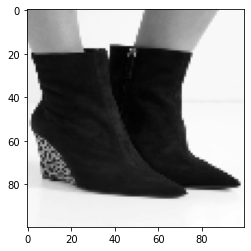

In [49]:

image_array=np.asarray(image_array)
plt.imshow(image_array[0].reshape(100,100),cmap="gray")


In [39]:
##creating dataframe from image array containing 10000 features
Pd_mat2=pd.DataFrame(image_array)

In [40]:
Pd_mat2.shape

(6000, 10000)

In [61]:
##displaying sample image to confirm the order of arrangement of elements
##first element should be same as that of first image in train so as to match the right label
def show_imgs(X):
    plt.figure(figsize=(8, 8))
    k = 0
    for i in range(0,4):
        for j in range(0,4):
            plt.subplot2grid((4,4),(i,j))
            plt.imshow(X[k].reshape(100,100),cmap="gray")
            k = k+1
    plt.show()

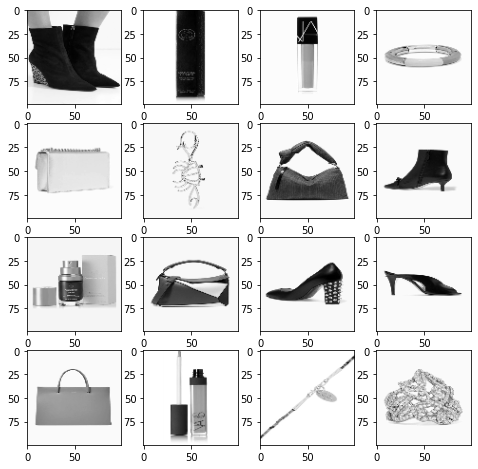

In [62]:
show_imgs(image_array)

COMMENT:- This proves that both the dataframes are same

In [64]:
Pd_mat2["target"]=labels

In [68]:
Pd_mat2.drop(columns=["label"],inplace=True)

In [69]:
Pd_mat2.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,...,9961,9962,9963,9964,9965,9966,9967,9968,9969,9970,9971,9972,9973,9974,9975,9976,9977,9978,9979,9980,9981,9982,9983,9984,9985,9986,9987,9988,9989,9990,9991,9992,9993,9994,9995,9996,9997,9998,9999,target
0,143,137,141,140,137,139,142,139,143,148,151,159,159,163,167,167,166,171,169,165,167,173,192,228,228,228,228,228,229,229,229,229,229,230,230,230,230,230,231,230,...,232,231,231,231,232,232,232,232,232,232,233,234,235,236,236,238,238,238,238,238,237,237,236,236,236,235,235,236,237,239,239,238,239,237,237,237,238,239,239,3
1,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,254,253,252,243,236,220,199,...,255,255,255,254,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,1
2,242,242,242,242,242,242,242,242,242,242,242,242,242,242,242,242,242,242,242,242,242,242,242,242,242,242,242,242,242,242,242,242,242,242,242,242,242,242,242,242,...,242,242,242,242,242,242,242,242,242,242,242,242,242,242,242,242,242,242,242,242,242,242,242,242,242,242,242,242,242,242,242,242,242,242,242,242,242,242,242,1
3,242,242,242,242,242,242,242,242,242,242,242,242,242,242,242,242,242,242,242,242,242,242,242,242,242,242,242,242,242,242,242,242,242,242,242,242,242,242,242,242,...,242,242,242,242,242,242,242,242,242,242,242,242,242,242,242,242,242,242,242,242,242,242,242,242,242,242,242,242,242,242,242,242,242,242,242,242,242,242,242,2
4,242,242,242,242,242,242,242,242,242,242,242,242,242,242,242,242,242,242,242,242,242,242,242,242,242,242,242,242,242,242,242,242,242,242,242,242,242,242,242,242,...,242,242,242,242,242,242,242,242,242,242,242,242,242,242,242,242,242,242,242,242,242,242,242,242,242,242,242,242,242,242,242,242,242,242,242,242,242,242,242,0


#***Applying Logistics Regression on second matrix***

In [74]:
##creating X2 and y2 variables

y2=Pd_mat2.target
X2=Pd_mat2.drop(columns="target")

In [75]:
##splitting into training and test sets

X2_train, X2_test, y2_train, y2_test = train_test_split(X2, y2, test_size=0.2)
print (X2_train.shape, y2_train.shape)
print (X2_test.shape, y2_test.shape)

(4800, 10000) (4800,)
(1200, 10000) (1200,)


In [ ]:
from sklearn.model_selection import GridSearchCV
from hypopt import GridSearch
param_grid = [{'C': [0.1,1,10],'solver': ['newton-cg','lbfgs']}]
 
# Grid-search all parameter combinations using a validation set.
opt2 = GridSearch(model = LogisticRegression(class_weight='balanced', multi_class="auto",
                        max_iter=200, random_state=1),param_grid = param_grid)
 
opt2.fit(X2_train, y2_train)
print(opt2.get_best_params())


In [ ]:
preds=opt2.predict(X2_test)
print("\nAccuracy on Test Data: ", accuracy_score(y2_test, preds))


Accuracy on Test Data:  0.9791666666666666
